In [16]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
#read the data
df=pd.read_csv('AirPassengers.csv')

In [18]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [19]:
df.dtypes

Month         object
Passengers     int64
dtype: object

In [20]:
#it is recommended that we make our time series reference as the index
df=pd.read_csv('AirPassengers.csv', parse_dates=['Month'])

In [21]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [22]:
df=pd.read_csv('AirPassengers.csv', parse_dates=['Month'],index_col='Month')

In [23]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [24]:
df.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [25]:
#we can take a suset od date
df['1951-04-01':'1952-03-01']

,Passengers
Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [26]:
#checking random record of a specific date
df.loc['1960-05-01']

Passengers    472
Name: 1960-05-01 00:00:00, dtype: int64

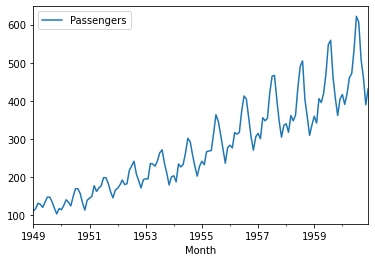

In [27]:
#plotting the time series
df.plot()
plt.rcParams["figure.figsize"] = (10,8)
plt.show()

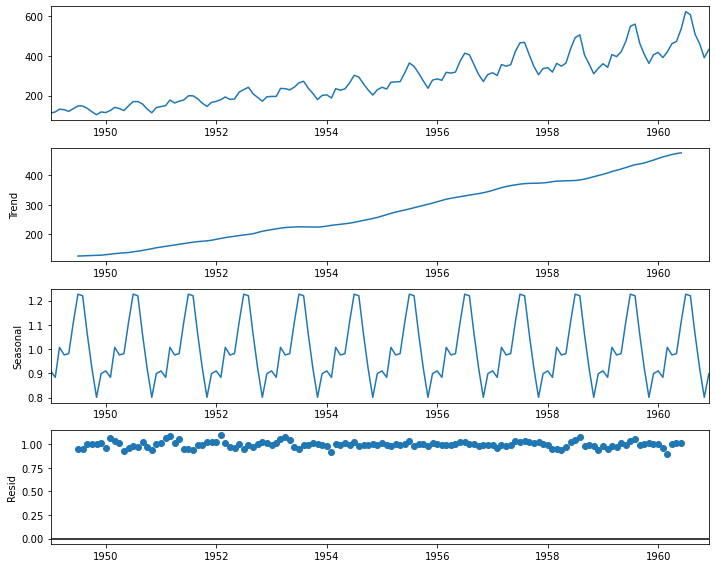

In [28]:
#as the seasonality is not constant we shall use multiplicative model
##decompose time series multiplicatively
df_mul_decompose=seasonal_decompose(df,model="multiplicative")
df_mul_decompose.plot()
plt.rcParams["figure.figsize"] = (14,8)
plt.show()

In [29]:
#log transformation
df_log=df.copy()

In [30]:
df_log['Passengers']=np.log(df)

In [31]:
df_log.Passengers

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Passengers, Length: 144, dtype: float64

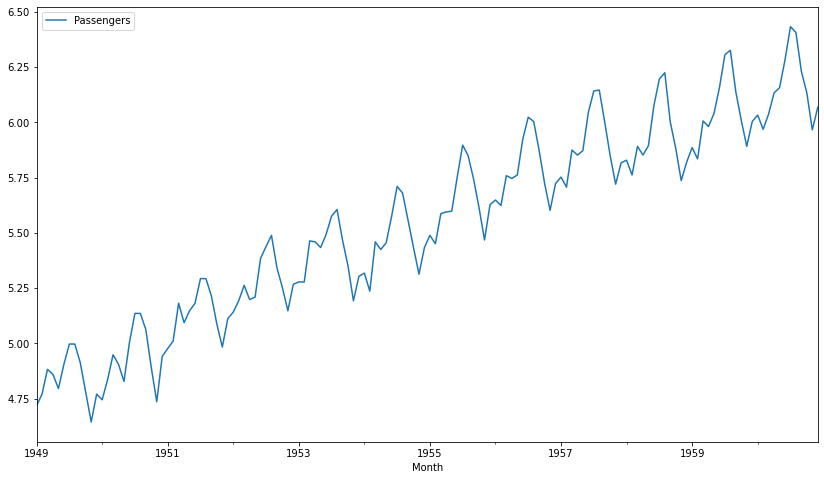

In [32]:
#vizualizing log transformed series
df_log.plot()
plt.show()

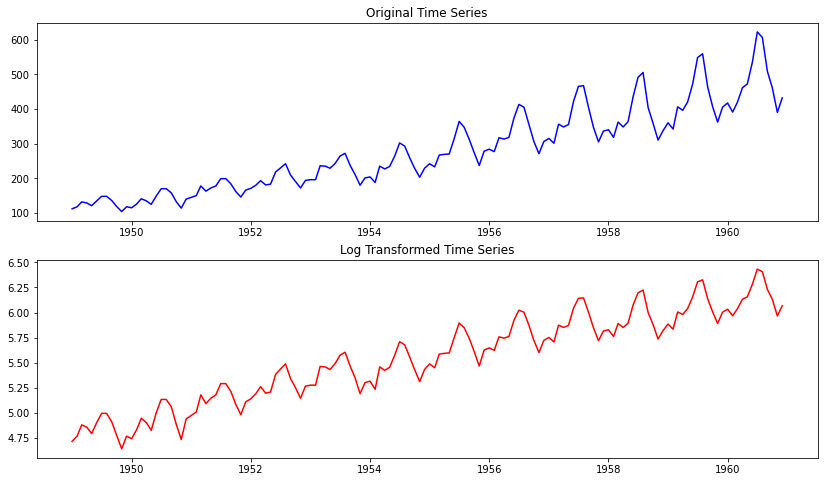

In [37]:
#comparing with original time series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df,'b')

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df_log,'r')
plt.show()